In [2]:
import pandas as pd

In [4]:
dataset = pd.read_csv('Dataset\MNIST ASL\sign_mnist_train.csv')

In [36]:
all = dataset.iloc[:,:]

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau


In [56]:
train_path = "Dataset/MNIST ASL/sign_mnist_train/sign_mnist_train.csv"
test_path = "Dataset/MNIST ASL/sign_mnist_test/sign_mnist_test.csv"

In [57]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [64]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


<AxesSubplot:xlabel='label', ylabel='count'>

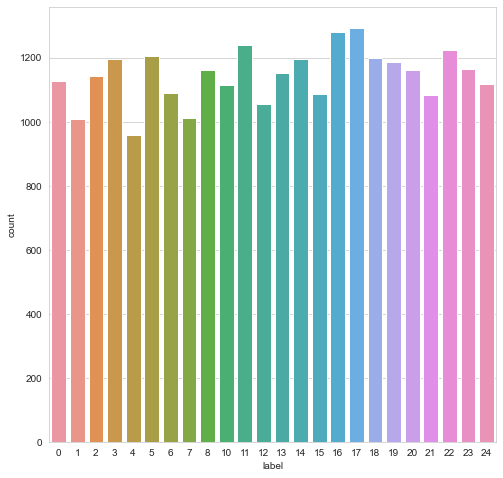

In [59]:
plt.figure(figsize = (8,8)) # Label Count
sns.set_style("whitegrid")
sns.countplot(train_df['label'])

In [43]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [44]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [45]:
x_train = train_df.values
x_test = test_df.values

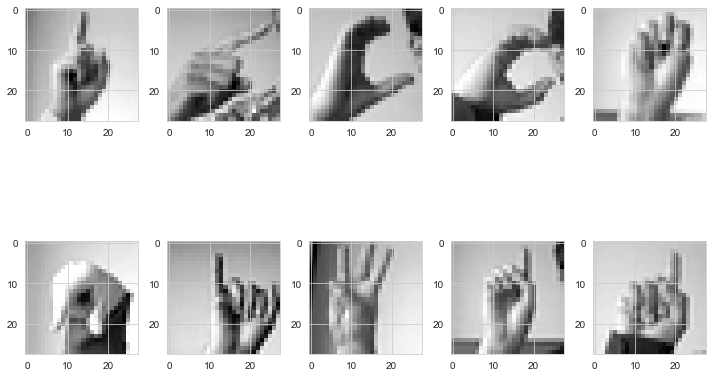

In [68]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()   

In [5]:
import numpy as np
np.any(np.isnan(dataset))

False

In [8]:
arr = np.array(dataset)
np.all((arr >= 0)&(arr <=255))

True